In [5]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from IPython.display import display 

import data_utils as data_utils
# Pretty display for notebooks
%matplotlib inline
pd.set_option('display.max_colwidth', -1)

dataset = pd.read_csv("datasets/dataset_clean.csv")
display(dataset.head(n = 5))


,AFEC_DPTO,AFEC_EDADR,AFEC_EDUC,AFEC_GENERO,AFEC_GETNICO,AFEC_MPIO,AFEC_PARENTESCO,AFEC_POBESPECIAL,AFEC_REGAFILIACION,AFEC_TIPOPER,...,PET_DPTO,PET_MPIO,PET_TIPOPER,PQR_CANAL,PQR_CLASE_SNS,PQR_ESTADO,PQR_TIPOATENCION,PQR_TIPOPETICION,RIESGO_VIDA,TRIM
0,bogota d.c.,de 13 a 17 años,ninguno,mujer,no aplica,bogotá,otro,no aplica,subsidiado,natural,...,bogota d.c.,bogotá,juridica,escrito,pqr,cerrado,peticion directa,reclamo,0,trim i
1,nariño,de 0 a 5 años,ninguno,hombre,no aplica,puerres,otro,no aplica,subsidiado,natural,...,nariño,puerres,natural,telefonico,pqr,cerrado,0,reclamo,0,trim i
2,valle,de 13 a 17 años,secundaria,hombre,no aplica,cali,abuelo (a),no aplica,contributivo,natural,...,valle,cali,natural,telefonico,pqr,cerrado,0,reclamo,0,trim i
3,huila,de 13 a 17 años,universitario incompleto,hombre,no aplica,neiva,padre,no aplica,contributivo,natural,...,huila,neiva,natural,personalizado,pqr,cerrado,0,reclamo,0,trim i
4,risaralda,de 13 a 17 años,ninguno,hombre,no aplica,dosquebradas,padre,persona en condición de discapacidad,contributivo,natural,...,risaralda,dosquebradas,natural,personalizado,pqr,pendiente (avance),0,reclamo,1,trim i


# Data Exploration

## Features Class Distribution

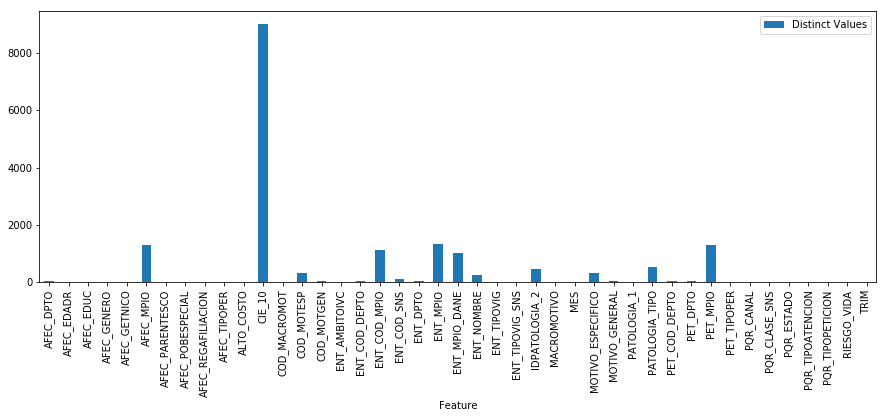

In [6]:
data_utils.showFeaturesDistribution(data_utils.getFeaturesDistribution(dataset))


## Redundant features

These features represent the same data, so we can keep only the codes and loose the descripion.

* COD_MACROMOT = MACROMOTIVO
* COD_MOTGEN = MOTIVO_GENERAL
* COD_MOTESP = MOTIVO_ESPECIFICO
* ENT_COD_DEPTO = ENT_DPTO
* ENT_COD_MPIO = ENT_MPIO
* PET_COD_DEPTO = PET_DPTO

In [7]:
features_raw = dataset.drop(['ENT_DPTO', 'ENT_MPIO', 'PET_DPTO', 'MACROMOTIVO', 'MOTIVO_GENERAL', 'MOTIVO_ESPECIFICO'], axis = 1)
features_raw = dataset.applymap(str)

## Encoding dataset

All features in the dataset are categorical. Some of them have too many classes to be one hot encoded. Mean encoding transformation will be perform on the dataset to encode features.

--- 2329.49499989 seconds ---


,AFEC_DPTO,AFEC_EDADR,AFEC_EDUC,AFEC_GENERO,AFEC_GETNICO,AFEC_MPIO,AFEC_PARENTESCO,AFEC_POBESPECIAL,AFEC_REGAFILIACION,AFEC_TIPOPER,...,PET_DPTO,PET_MPIO,PET_TIPOPER,PQR_CANAL,PQR_CLASE_SNS,PQR_ESTADO,PQR_TIPOATENCION,PQR_TIPOPETICION,RIESGO_VIDA,TRIM
0,0.202759,0.265592,0.195839,0.204019,0.234061,0.219786,0.267108,0.221667,0.286989,0.214974,...,0.204364,0.223824,0.125656,0.085179,0.248546,0.072410,0.096747,0.246683,0.200505,0.1844
1,0.205009,0.283721,0.195839,0.230467,0.234061,0.166667,0.267108,0.221667,0.286989,0.214974,...,0.177257,0.115789,0.204107,0.166180,0.248546,0.072410,0.277172,0.246683,0.200505,0.1844
2,0.240466,0.265592,0.230512,0.230467,0.234061,0.236801,0.319925,0.221667,0.195013,0.214974,...,0.234009,0.233508,0.204107,0.166180,0.248546,0.072410,0.277172,0.246683,0.200505,0.1844
3,0.309155,0.265592,0.319421,0.230467,0.234061,0.349777,0.311151,0.221667,0.195013,0.214974,...,0.285781,0.337184,0.204107,0.518737,0.248546,0.072410,0.277172,0.246683,0.200505,0.1844
4,0.214868,0.265592,0.195839,0.230467,0.234061,0.221550,0.311151,0.385514,0.195013,0.214974,...,0.202419,0.211750,0.204107,0.518737,0.248546,0.996105,0.277172,0.246683,0.200505,0.1844


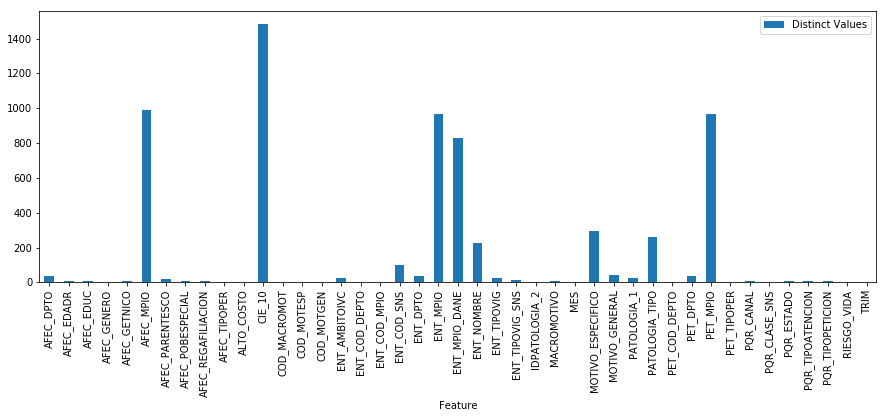

In [8]:
from category_encoders import *
import time


start_time = time.time()   
enc = TargetEncoder(cols=features_raw.columns.values.tolist(), return_df = True).fit(dataset, dataset[['RIESGO_VIDA']])
dataset_encoded = enc.transform(features_raw)
print("--- %s seconds ---" % (time.time() - start_time))

display(dataset_encoded.head(n = 5))  

data_utils.showFeaturesDistribution(data_utils.getFeaturesDistribution(dataset_encoded))

In [9]:
features_columns = dataset.columns.values.tolist()

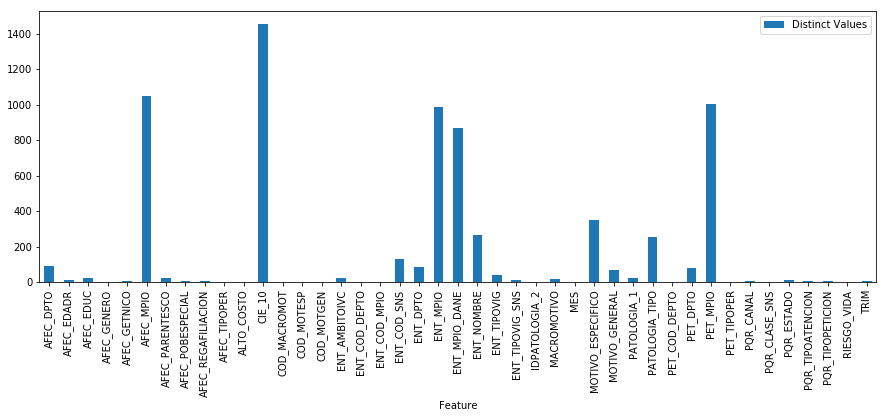

In [10]:

# Normalization with QuantileTransformer
from sklearn.preprocessing import QuantileTransformer

# Initialize a scaler, then apply it to the features
#scaler = QuantileTransformer() # default=(0, 1)
scaler = QuantileTransformer()

features_log_minmax_transform = pd.DataFrame(data = dataset_encoded)
features_log_minmax_transform[features_columns] = scaler.fit_transform(dataset_encoded[features_columns])

#distribution(features_log_minmax_transform, transformed = True)
# Show an example of a record with scaling applied
data_utils.showFeaturesDistribution(data_utils.getFeaturesDistribution(features_log_minmax_transform))

In [11]:
display(features_log_minmax_transform.head(n = 5))

,AFEC_DPTO,AFEC_EDADR,AFEC_EDUC,AFEC_GENERO,AFEC_GETNICO,AFEC_MPIO,AFEC_PARENTESCO,AFEC_POBESPECIAL,AFEC_REGAFILIACION,AFEC_TIPOPER,...,PET_DPTO,PET_MPIO,PET_TIPOPER,PQR_CANAL,PQR_CLASE_SNS,PQR_ESTADO,PQR_TIPOATENCION,PQR_TIPOPETICION,RIESGO_VIDA,TRIM
0,0.483984,0.759760,0.559560,0.558058,0.625125,0.673173,0.788288,0.594094,1.000000,1.0,...,0.468969,0.707708,0.023524,0.038539,1.0,0.488989,0.209209,0.634134,1.000000e-07,1.000000e-07
1,0.619119,0.797798,0.559560,1.000000,0.625125,0.272404,0.788288,0.594094,1.000000,1.0,...,0.266266,0.036155,1.000000,0.628128,1.0,0.488989,1.000000,0.634134,1.000000e-07,1.000000e-07
2,0.843343,0.759760,0.701702,1.000000,0.625125,0.792793,0.881381,0.594094,0.459459,1.0,...,0.855355,0.830330,1.000000,0.628128,1.0,0.488989,1.000000,0.634134,1.000000e-07,1.000000e-07
3,0.984985,0.759760,1.000000,1.000000,0.625125,0.974975,0.870871,0.594094,0.459459,1.0,...,0.978478,0.973473,1.000000,1.000000,1.0,0.488989,1.000000,0.634134,1.000000e-07,1.000000e-07
4,0.646146,0.759760,0.558058,1.000000,0.625125,0.727728,0.870871,0.967467,0.459459,1.0,...,0.431932,0.623624,1.000000,1.000000,1.0,1.000000,1.000000,0.634134,1.000000e-07,1.000000e-07


In [15]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

dataset_shuffle = features_log_minmax_transform
dataset_shuffle = dataset_shuffle.drop(['RIESGO_VIDA'], axis = 1)
dataset_shuffle['RIESGO_VIDA'] = dataset[['RIESGO_VIDA']]

dataset_shuffle = shuffle(dataset_shuffle)

dataset_shuffle.to_csv("datasets/dataset.csv", encoding='utf-8', index = False)




## Post Processing Exploration

The target feature RIESGO_VIDA still has low correlation weight inrelation with the other features, but nevertheless it has more relevance than the correlation analysis in the original dataset.

Specifically, the features more related with the target feature are the motive fields  (CODMACROMOT  (0.4),  CODMOTGEN  (0.4)  and  CODMOTESP(0.5)), these are features representing the reason on why the patient is raising the right of request.  

,AFEC_DPTO,AFEC_EDADR,AFEC_EDUC,AFEC_GENERO,AFEC_GETNICO,AFEC_MPIO,AFEC_PARENTESCO,AFEC_POBESPECIAL,AFEC_REGAFILIACION,AFEC_TIPOPER,...,PET_DPTO,PET_MPIO,PET_TIPOPER,PQR_CANAL,PQR_CLASE_SNS,PQR_ESTADO,PQR_TIPOATENCION,PQR_TIPOPETICION,RIESGO_VIDA,TRIM
0,0.483984,0.759760,0.559560,0.558058,0.625125,0.673173,0.788288,0.594094,1.000000,1.0,...,0.468969,0.707708,0.023524,0.038539,1.0,0.488989,0.209209,0.634134,1.000000e-07,1.000000e-07
1,0.619119,0.797798,0.559560,1.000000,0.625125,0.272404,0.788288,0.594094,1.000000,1.0,...,0.266266,0.036155,1.000000,0.628128,1.0,0.488989,1.000000,0.634134,1.000000e-07,1.000000e-07
2,0.843343,0.759760,0.701702,1.000000,0.625125,0.792793,0.881381,0.594094,0.459459,1.0,...,0.855355,0.830330,1.000000,0.628128,1.0,0.488989,1.000000,0.634134,1.000000e-07,1.000000e-07


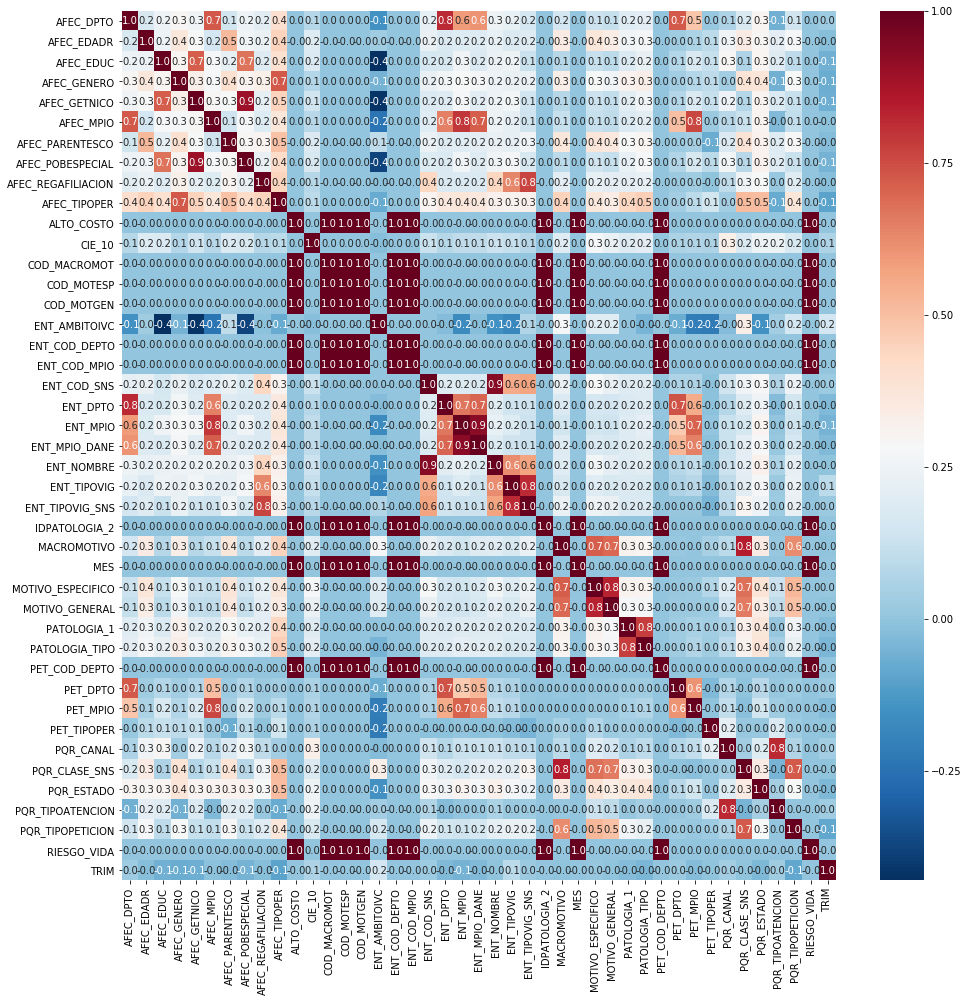

In [13]:
import seaborn as sns
plt.figure(figsize=(16, 16))

duplicated_dataset = features_log_minmax_transform
display(duplicated_dataset.head(n = 3))
ax = sns.heatmap(duplicated_dataset.corr(), cmap = "RdBu_r", annot=True, fmt='.1f')